read the data from nist... file   
    problem may come up: can't read the data    
                         can't related the data with colunm      
                         type error     
  
    
mapping wafer    
    pro: how to mapping?    
         how to do sth like circle backgrond     
         
goal 1:
    for each pixel which pad them go

goal 2:
    for neighbor pad which pixel they go

    

paper(more like backgroud introduction) or pdf 
    Fig 17
        circle
        cross (focus point)
        dark point

Airy disk

crosstalk

​
Yifu Chen
​
https://arxiv.org/pdf/1403.4302

We talked about Figure 17, and crosstalk.

https://en.wikipedia.org/wiki/Airy_disk

https://webbtelescope.org/contents/media/images/01G529MX46J7AFK61GAMSHKSSN

base on ![alt text](../../thumbnail_image.png)        
try add add "pad label" in data processing


In [1]:
import matplotlib.pyplot as plt

def save2poster(name):
    plt.savefig('D:/UNM/24Summer/QuReseach/poster/'+name)

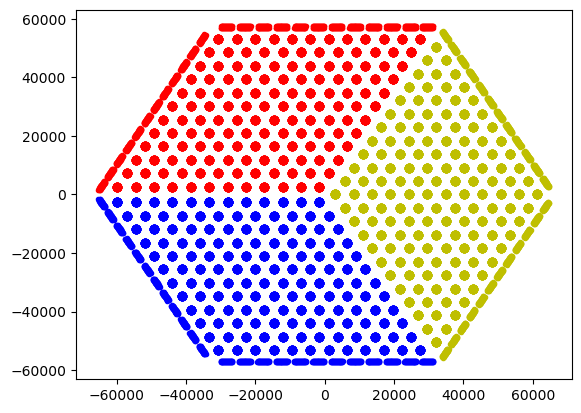

In [2]:
#This will be the program first use histogram  and then mapping the wafer

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd


#Read the data
data = pd.read_csv('nist_so_mf_detector_array_padinfo.csv')

#get columns vaule about pixel positon
pixel_x_center = data['Pixel X center']
pixel_y_center = data['Pixel Y center']

#use _A _B _C for grouping the pixel
Pixel_x_A = []
Pixel_y_A = []
Pixel_x_B = []
Pixel_y_B = []
Pixel_x_C = []
Pixel_y_C = []

# try use same method above by Pad X center,Pad Y center
# pad_x_center = data['Pad X center']
# pad_y_center = data['Pad Y center']

pad_x_center_A = []
pad_y_center_A = []
PXCB = []
PYCB = []
PXCC = []
PYCC = []


for i in range(len(data)):
    
    if data['Group Section'][i] == 'A':
        
        Pixel_x_A.append(int(data['Pixel X center'][i]))
        Pixel_y_A.append(int(data['Pixel Y center'][i]))
        pad_x_center_A.append(int(data['Pad X center'][i]))
        pad_y_center_A.append(int(data['Pad Y center'][i]))
    
    if data['Group Section'][i] == 'B':
        
        Pixel_x_B.append(int(data['Pixel X center'][i]))
        Pixel_y_B.append(int(data['Pixel Y center'][i]))
        PXCB.append(int(data['Pad X center'][i]))
        PYCB.append(int(data['Pad Y center'][i]))

    if data['Group Section'][i] == 'C':
        
        Pixel_x_C.append(int(data['Pixel X center'][i]))
        Pixel_y_C.append(int(data['Pixel Y center'][i]))
        PXCC.append(int(data['Pad X center'][i]))
        PYCC.append(int(data['Pad Y center'][i]))


#pad_x_center = pad_x_center[100:150] #The code see how pad positon data goes
#pad_y_center = pad_y_center[100:150]


#histogram
# plt.hist2d(pixel_x_center, pixel_y_center, bins = (100,100), norm=colors.LogNorm())
# plt.colorbar()
#plt.scatter(pixel_x_center, pixel_y_center, c='r', marker='o')
plt.scatter(Pixel_x_A, Pixel_y_A, c='r', marker='o')
plt.scatter(Pixel_x_B, Pixel_y_B, c='y', marker='o')
plt.scatter(Pixel_x_C, Pixel_y_C, c='b', marker='o')

plt.scatter(pad_x_center_A, pad_y_center_A, c='r', marker='.')
plt.scatter(PXCB, PYCB, c='y', marker='.')
plt.scatter(PXCC, PYCC, c='b', marker='.')
#colors.LogNorm() normalize a given value to the 0-1 range on a log scale to show the log scale
# use norm to emphasize the exist value 
save2poster('all.svg')
plt.show()

#this plot show the wafer location in the plot

In [3]:
""" You can ignore the code below it is same function as the cell below

    this part of code will help me understand to achieve goal 1 of the project
    try to re-group the data by pixel x and pixel y
    to show what is right number of distance I should look for
"""

# data_goal1 = data[['Pixel X center', 'Pixel Y center', 'Pad X center', 'Pad Y center']]
# data_goal1 = np.array(data_goal1).tolist()

# #get unique pixel x 
# unique_pixel_x = np.unique(pixel_x_center)

# distance_goal1 = []
# #first group the data by pixel x save to group_data
# #and then group the data by pixel y
# #and then calculate the distance to the pad

# #group_data = []
# group_data_y = []
# number_of_distance = []

# for j in range(len(unique_pixel_x)):    
    
#     group_same_x = []    

#     #first group the data by pixel x
#     for i in range(len(data)):
#         if pixel_x_center[i] == unique_pixel_x[j]:
#             group_same_x.append(data_goal1[i])

#     # get pixel y position from group_data
#     group_same_x = np.array(group_same_x)
#     y_pixel_in_group = group_same_x[:,1]
#     unique_pixel_y = np.unique(y_pixel_in_group)   
#     for k in range(len(unique_pixel_y)):

#         group_same_y = []
#         for i in range(len(group_same_x)):
#             if y_pixel_in_group[i] == unique_pixel_y[k]:
#                 #group the data by same pixel y   
#                 group_same_y.append(group_same_x[i])
#                 group_data_y.append(group_same_x[i])
        
#         length_group_y = len(group_same_y)
#         number = 0
#         #calculate the distance between pad for one group
#         for i in range(length_group_y ):
#             number += 1
#         number_of_distance.append(number)
        
    
# path_filename = '.\data\same pixel x and y data'    
# # Save data to CSV
# regroup_data = np.array(group_data_y)
# data_RG = np.column_stack((regroup_data[:,0],regroup_data[:,1],regroup_data[:,2],regroup_data[:,3])) 
# # the data for number_per_bin
# df = pd.DataFrame(data_RG,columns=['Pixel X center', 'Pixel Y center', 'Pad X center', 'Pad Y center'])
# df.to_csv(f'{path_filename}.csv', index=False)

# reshape_number_of_distance = np.reshape(number_of_distance,(1,len(number_of_distance)))
# reshape_number_of_distance = np.array(reshape_number_of_distance)   
# data_ND = np.column_stack((reshape_number_of_distance))
# df2 = pd.DataFrame(data_ND,columns=[f'Sum of ND is {np.sum(number_of_distance)}']) 
# df2.to_csv('.\data\distance num for goal1.csv', index=False)  

print('same below')


same below


this part of code is the goal 1 of the project     
>calculate the data for each pixel the distance to the related pad
>histogram of the data

In [4]:
""" Goal 1 Ver2
# it is vert important to keep index same 
#Index help: 
    # Grouptype is 0; GroupIndex is 1; Group Section is 2; pad label is 3
    # Pad X center is 6; Pad Y center is 7; 
    # Pixel X center is 4; Pixel Y center is 5


get_columns = ['Grouptype','GroupIndex','Group Section','Pad Label',
                   'Pixel X center', 'Pixel Y center', 
                   'Pad X center', 'Pad Y center']
data_goal1 = data[get_columns]

GrouptypeIndex = 0
GroupIndexIndex = 1
GroupSectionIndex = 2
PadLabelIndex = 3
PixelXIndex = 4
PixelYIndex = 5
PadXIndex = 6
PadYIndex = 7

data_goal1 = np.array(data_goal1).tolist()

#get unique pixel x 
unique_pixel_x = np.unique(pixel_x_center)

goal1 = [],[],[]
#save dis and all pad info to goal1

#first group the data by pixel x save to group_data
#and then group the data by pixel y
#and then calculate the distance to the pad

#number_of_distance = []

for j in range(len(unique_pixel_x)):

    group_data = []

    y_pixel_in_group = []

    #first group the data by pixel x
    for i in range(len(data)):
        if pixel_x_center[i] == unique_pixel_x[j]:
            group_data.append(data_goal1[i])
            y_pixel_in_group.append(data_goal1[i][PixelYIndex])
    #print(y_pixel_in_group)
    # get pixel y position from group_data
    #group_data = np.array(group_data)
    #y_pixel_in_group = group_data[:,1]
    unique_pixel_y = np.unique(y_pixel_in_group)   
    for k in range(len(unique_pixel_y)):

        group_data_y = []
        for i in range(len(group_data)):
            if y_pixel_in_group[i] == unique_pixel_y[k]:
                #group the data by same pixel y   
                group_data_y.append(group_data[i])
        
        length_group_y = len(group_data_y)

        #calculate the distance between pad for one group

        # save the info about distance is which pad to which 

        for i in range(length_group_y):
            
            #print(group_data_y[i],"end i")
            if i+1 < length_group_y: 
                # save pad info
                first_pad = group_data_y[i]
                #list[start:stop] extracts elements from start up to but not including stop. 
                #print(first_pad)
                second_pad = group_data_y[i+1]
                
                goal1[1].append(first_pad)
                goal1[2].append(second_pad)

                #number_dis_4_group += 1
                pad_x_distance = (group_data_y[i][PadXIndex] - group_data_y[i+1][PadXIndex])
                pad_y_distance = group_data_y[i][PadYIndex] - group_data_y[i+1][PadYIndex]
            
            elif i+1 == length_group_y:
                # save pad info
                first_pad = group_data_y[i]
                second_pad = group_data_y[0]
                goal1[1].append(first_pad)
                goal1[2].append(second_pad)

                #number_dis_4_group += 1
                pad_x_distance = group_data_y[i][PadXIndex] - group_data_y[0][PadXIndex]
                pad_y_distance = group_data_y[i][PadYIndex] - group_data_y[0][PadYIndex]
                
            distance = np.sqrt((pad_x_distance)**2 + (pad_y_distance)**2)
            #let distance keep three decimal places
            distance = round(distance,3)
            goal1[0].append(distance)

        
        #number_of_distance.append(number_dis_4_group)

#show how many data we calculted the distance
distance_goal1 = goal1[0]
print("We have ",len(distance_goal1),
      " data \n max is: ",np.max(distance_goal1),
      "\n min is: ",np.min(distance_goal1)) 
#print(np.unique(distance_goal1))

#save histogram data to a file         
#print(len(distance_goal1)) #num ==len(distance_goal1)
num, bins, patches = plt.hist(distance_goal1, bins=1000)
# bins = 100000 need 6m 51s to run

path_filename = f'.\data\goal1 Ver2.0 {len(bins)-1}bins '


#create an array stored the value number per bin
number_per_bin = []
for i in range(len(patches)):
    if num[i] != 0:
        number_per_bin.append([f"({bins[i]},{bins[i+1]})",num[i]])
            
# Save data to CSV
number_per_bin = np.array(number_per_bin)
data_NpB = np.column_stack((number_per_bin[:,0],number_per_bin[:,1])) 
# the data for number_per_bin
df = pd.DataFrame(data_NpB,columns=['range of distance','number in the range'])
df.to_csv(f'{path_filename}.csv', index=False)

plt.xscale('log')
plt.savefig(f'{path_filename}.png')  
#plt.show()
plt.clf()# not show the plot for pad analysis   

# print(np.sum(num)) 
# print(number_of_distance,"\n",sum(number_of_distance)) 
# #check the number of distance is correct    
#"""

print("old Version may logical wrong")

old Version may logical wrong


In [5]:
# goal 1 Ver2.1
# update the may logiacal error for distance calculation in Ver2

""" 
this part of code is the goal 1 of the project
    calculate the data for each pixel the distance to the related pad
    histogram of the data
"""
# it is vert important to keep index same 
#Index help: 
    # Grouptype is 0; GroupIndex is 1; Group Section is 2; pad label is 3
    # Pad X center is 6; Pad Y center is 7; 
    # Pixel X center is 4; Pixel Y center is 5


get_columns = ['Grouptype','GroupIndex','Group Section','Pad Label',
                   'Pixel X center', 'Pixel Y center', 
                   'Pad X center', 'Pad Y center']
data_goal1 = data[get_columns]

GrouptypeIndex = 0
GroupIndexIndex = 1
GroupSectionIndex = 2
PadLabelIndex = 3
PixelXIndex = 4
PixelYIndex = 5
PadXIndex = 6
PadYIndex = 7

data_goal1 = np.array(data_goal1).tolist()

#get unique pixel x 
unique_pixel_x = np.unique(pixel_x_center)

goal1 = [],[],[]
#save dis and all pad info to goal1

#first group the data by pixel x save to group_data
#and then group the data by pixel y
#and then calculate the distance to the pad

except_total_data = []
group_number = 0

for j in range(len(unique_pixel_x)):

    group_data = []

    y_pixel_in_group = []

    #first group the data by pixel x
    for i in range(len(data)):
        if pixel_x_center[i] == unique_pixel_x[j]:
            group_data.append(data_goal1[i])
            y_pixel_in_group.append(data_goal1[i][PixelYIndex])
    #print(y_pixel_in_group)
    # get pixel y position from group_data
    #group_data = np.array(group_data)
    #y_pixel_in_group = group_data[:,1]
    unique_pixel_y = np.unique(y_pixel_in_group)   
    group_number += len(unique_pixel_y)

    for k in range(len(unique_pixel_y)):

        group_data_y = []
        for i in range(len(group_data)):
            if y_pixel_in_group[i] == unique_pixel_y[k]:
                #group the data by same pixel y   
                group_data_y.append(group_data[i])
        
        length_group_y = len(group_data_y)

        #calculate the distance between pad for one group

        # save the info about distance is which pad to which 

        # calculate the except total number of distance for each group
        except_total_data.append(length_group_y* (length_group_y -1)/2)
        # except = (len-1) + (len-2) + (len-3) + ... + 1
        # except = (len-1)*len/2


        for i in range(length_group_y):
            for j in range(i+1,length_group_y):
                 
                # save pad info
                first_pad = group_data_y[i]
                #list[start:stop] 
                #extracts elements from start up to but not including stop.
                second_pad = group_data_y[j]
                
                goal1[1].append(first_pad)
                goal1[2].append(second_pad)

                pad_x_distance = group_data_y[i][PadXIndex] - group_data_y[j][PadXIndex]
                pad_y_distance = group_data_y[i][PadYIndex] - group_data_y[j][PadYIndex]
                   
                distance = np.sqrt((pad_x_distance)**2 + (pad_y_distance)**2)
                distance = round(distance,3) #let distance keep three decimal places
                goal1[0].append(distance)

#show how many data we calculted the distance

print("except total for each group: ",except_total_data)
print("total except: ",sum(except_total_data))
print("unique of except: ",np.unique(except_total_data))
#45 = 9 * len(10) / 2; 28 = 7 * len(8) / 2
print("length of except(group number): ",len(except_total_data))
except_45 = 0
for i in range(len(except_total_data)):
    if except_total_data[i] == 45:
        except_45 += 1
print("how many except is 45: ",except_45," (= 12 * 3)")

distance_goal1 = goal1[0]
print("\n We have ",len(distance_goal1),
      " data \n  max is: ",np.max(distance_goal1),
      "\n  min is: ",np.min(distance_goal1)) 
#print(np.unique(distance_goal1))


except total for each group:  [45.0, 28.0, 28.0, 28.0, 28.0, 45.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 45.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 45.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 45.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 45.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 45.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 45.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 45.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 45.

total except:  12708.0
unique of except:  [28. 45.]
length of except(group number):  432
how many except is 45:  36  (= 12 * 3)
If no x label, should be like 28*432 = 12096 
(12708 - 12096 = 612 = 36 (group with x label) * (45-36) )

 We have  12708  data 
  max is:  108833.078 
  min is:  140.0


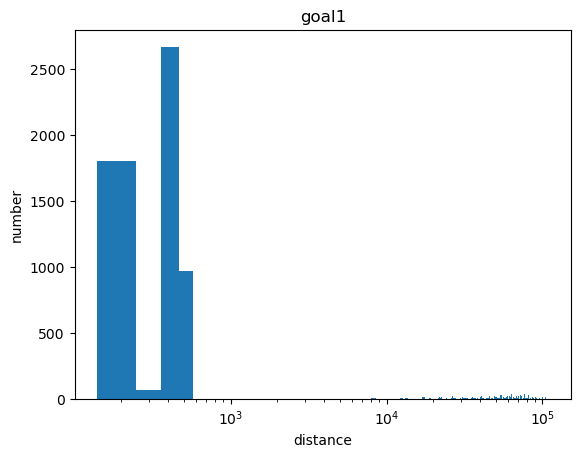

group number is:  432


In [6]:
#save histogram data to a file         
#print(len(distance_goal1)) #num ==len(distance_goal1)
num, bins, patches = plt.hist(distance_goal1, bins=1000)
# bins = 100000 need 6m 51s to run

path_filename = f'.\data\goal1 Ver2.1 {len(bins)-1}bins '


#create an array stored the value number per bin
number_per_bin = []
for i in range(len(patches)):
    if num[i] != 0:
        number_per_bin.append([f"({bins[i]},{bins[i+1]})",num[i]])
            
# Save data to CSV
number_per_bin = np.array(number_per_bin)
data_NpB = np.column_stack((number_per_bin[:,0],number_per_bin[:,1])) 
# the data for number_per_bin
df = pd.DataFrame(data_NpB,columns=['range of distance','number in the range'])
df.to_csv(f'{path_filename}.csv', index=False)

plt.xscale('log')
plt.title("goal1")
plt.xlabel("distance")
plt.ylabel("number")

plt.savefig(f'{path_filename}.png')  
save2poster('goal1.svg')
plt.show()
#plt.clf() # not show the plot for pad analysis   

# print(np.sum(num)) 
# print(number_of_distance,"\n",sum(number_of_distance)) 
# #check the number of distance is correct   
print("group number is: ",group_number)

#end of goal 1 Ver2.1

Group number is 432    
432 * 4 * 2 = 3456 (pixel * detector/pixel * in/out)     
3528 - 3456 = 72 = 6 * 12 (6 parts * 12 close group in part)     

In [7]:
# save goal1 ver2.1 to a file

pad_columns_1st = ['1st '+column for column in get_columns]
pad_columns_2nd = ['2nd '+column for column in get_columns]

column_names = ['distance']\
    +pad_columns_1st\
    +pad_columns_2nd
#[GrouptypeIndex:PadLabelIndex+1]

goal1_dis = np.array(goal1[0])
goal1_first_pad_info = np.array(goal1[1])
goal1_second_pad_info = np.array(goal1[2])

record_change = []
# change distance and recell column names when change the pixel position
for i in range(len(goal1_dis)):
    if i+1 < len(goal1_dis):
        if goal1_dis[i] != -10.110:
            if goal1_first_pad_info[i][PixelXIndex] != goal1_first_pad_info[i+1][PixelXIndex]\
            or goal1_first_pad_info[i][PixelYIndex] != goal1_first_pad_info[i+1][PixelYIndex]:
                
                record_change.append(i+1)

not_real_dis = [-10.110]
 #none dis is - use 10.110 show N(ext) G(roup) form morse code
for i in range(len(record_change)):
    goal1_dis = np.insert(goal1_dis,record_change[i]+i,not_real_dis)
    goal1_first_pad_info = np.insert(goal1_first_pad_info,record_change[i]+i,pad_columns_1st,axis=0)
    goal1_second_pad_info = np.insert(goal1_second_pad_info,record_change[i]+i,pad_columns_2nd,axis=0)


# #limit the info in goal1[1] and goal1[2] to GrouptypeIndex:PadLabelIndex+1
# goal1_first_pad_info = goal1_first_pad_info[:,GrouptypeIndex:PadLabelIndex+1]
# goal1_second_pad_info = goal1_second_pad_info[:,GrouptypeIndex:PadLabelIndex+1]



data_goal1 = np.column_stack((goal1_dis,goal1_first_pad_info,goal1_second_pad_info))
df_goal1 = pd.DataFrame(data_goal1,columns = column_names)
df_goal1.to_csv('.\data\goal1 Ver2.1 all pad pixel info.csv', index=False)  



In [8]:
#show how many pixel position we have
"""
# Example list of positions
positions = [(1, 2), (2, 3), (1, 2), (4, 5), (2, 3)]

# Step 1: Initialize an empty set
unique_positions = set()

# Step 2: Iterate through the list and add each position to the set
for position in positions:
      unique_positions.add(position)

# Step 4: Get the number of unique positions
num_unique_positions = len(unique_positions)

print(unique_positions)
"""

pixel_positions = []
for i in range(len(data)):
    pixel_positions.append((pixel_x_center[i],pixel_y_center[i]))

#print(pixel_positions)
unique_pixel_positions = set()
for position in pixel_positions:
    unique_pixel_positions.add(position)

len_pixel_positions = len(unique_pixel_positions)

print(unique_pixel_positions)
print("length is: ", len_pixel_positions)

{(29559.956, 0.0), (-25379.978, -53139.281), (50759.956, 18359.739), (-25379.978, 43959.412), (-28029.978, 2650.0), (1120.022, -16419.804), (21609.956, -13769.804), (42809.956, 4589.935), (6420.022, -43959.412), (-43929.978, -2650.0), (26909.956, -41309.412), (6420.022, 53139.281), (-33329.978, -48549.346), (1120.022, 7239.935), (-6829.978, -11829.869), (-30679.978, -25599.673), (42809.956, -32129.542), (50759.956, -18359.739), (40159.956, -27539.608), (-4179.978, -16419.804), (24259.956, 27539.608), (-12129.978, -39369.477), (21609.956, 32129.542), (-4179.978, 7239.935), (24970.022, -48549.346), (-33329.978, 48549.346), (3770.022, -30189.608), (21609.956, -4589.935), (-35979.978, -34779.542), (-1529.978, -30189.608), (24970.022, 48549.346), (14370.022, 39369.477), (11009.956, -4589.935), (26909.956, 13769.804), (-28029.978, -21009.739), (-38629.978, -11829.869), (-25379.978, -34779.542), (9070.022, -30189.608), (37509.956, -13769.804), (58709.956, 4589.935), (-9479.978, 53139.281), (4

From goal2 way2 we know the distance bigger than 361 is show that two pad is real neighbor    
    less 361 is the one next to each other      
    ????    

In [9]:
#by check the CSV file I want to see all the pad & pixel info for dis < 361
g1_dis_less_361 = []
g1_1st_info_less_361 = []
g1_2nd_info_less_361 = []

for i in range(len(goal1_dis)):
    if goal1_dis[i] > 0 and goal1_dis[i] < 361:
        g1_dis_less_361.append(goal1_dis[i])
        g1_1st_info_less_361.append(goal1_first_pad_info[i])
        g1_2nd_info_less_361.append(goal1_second_pad_info[i])

g1_dis_less_361 = np.array(g1_dis_less_361)
g1_1st_info_less_361 = np.array(g1_1st_info_less_361)
g1_2nd_info_less_361 = np.array(g1_2nd_info_less_361)

#remove the column I don't need
g1_1st_info_less_361 = g1_1st_info_less_361[:,GrouptypeIndex:PadLabelIndex+1]
g1_2nd_info_less_361 = g1_2nd_info_less_361[:,GrouptypeIndex:PadLabelIndex+1]

col_names_need = ['pad distance']\
    +pad_columns_1st[GrouptypeIndex:PadLabelIndex+1]\
    +pad_columns_2nd[GrouptypeIndex:PadLabelIndex+1]

g1_data_less_361 = np.column_stack((g1_dis_less_361,g1_1st_info_less_361,g1_2nd_info_less_361))
g1_df_less_361 = pd.DataFrame(g1_data_less_361,columns = col_names_need)
g1_df_less_361.to_csv('.\data\goal1 Ver2.1 dis less 361 all info.csv', index=False)


In [10]:
import pandas as pd

# Step 1: Read the CSV file
df = pd.read_csv('.\data\goal1 Ver2.1 dis less 361 all info.csv')

# Step 2: Sort the data by 'pad distance' in ascending order (use descending order with ascending=False)
df_sorted = df.sort_values(by='pad distance', ascending=True)

# Optional: Reset the index if you want a clean, sequential index in the new file
df_sorted.reset_index(drop=True, inplace=True)

# Step 3: Write the sorted data to a new CSV file
df_sorted.to_csv('.\data\goal1 Ver2.1 DL361 All Sorted by dis.csv', index=False)

In [11]:
# not analysis the pad info before whether the Ver2 or Ver2.1 is right
"""
# pad analysis
#save the goal info to a file
goal1_dis = np.array(goal1[0])
goal1_first_pad_info = np.array(goal1[1])
goal1_second_pad_info = np.array(goal1[2])

# Convert pad info lists to strings to ensure compatibility
# goal1_first_pad_info_str = [str(info) for info in goal1_first_pad_info]
# goal1_second_pad_info_str = [str(info) for info in goal1_second_pad_info]

data_dis_pad_info = np.column_stack((goal1_dis, goal1_first_pad_info, goal1_second_pad_info))

pad_columns_1st = ['1st '+column for column in get_columns]
pad_columns_2nd = ['2nd '+column for column in get_columns]

df2 = pd.DataFrame(data_dis_pad_info,columns = ['pad distance']+pad_columns_1st+pad_columns_2nd)
df2.to_csv(f'.\data\goal1 Ver2.0 all pad info.csv', index=False)

#pick up all pad info related to the label X which is x00+ or x00-
xlabel_info_dis = []
xlabel_info_1st_pad = []
xlabel_info_2nd_pad = []

for i in range(len(goal1_first_pad_info)):
    #print(goal1_first_pad_info[i][PadLabelIndex])
    
    if 'X' in goal1_first_pad_info[i][PadLabelIndex] \
        or 'X' in goal1_second_pad_info[i][PadLabelIndex]:
        xlabel_info_dis.append(goal1_dis[i])
        xlabel_info_1st_pad.append(goal1_first_pad_info[i])
        xlabel_info_2nd_pad.append(goal1_second_pad_info[i])

xlabel_info_dis = np.array(xlabel_info_dis)
xlabel_info_1st_pad = np.array(xlabel_info_1st_pad)
xlabel_info_2nd_pad = np.array(xlabel_info_2nd_pad)
#print(xlabel_info_1st_pad)
xlabel_info = np.column_stack((xlabel_info_dis, xlabel_info_1st_pad, xlabel_info_2nd_pad))

column_name = ['pad distance']+pad_columns_1st+pad_columns_2nd  
df3 = pd.DataFrame(xlabel_info, columns=column_name)
df3.to_csv('.\data\goal1 Ver2.0 X label pad info.csv', index=False)
"""
print("not work for now")


not work for now


In [12]:
# # try to use other method to achieve goal 1
# #use sorted() function to sort the data by pixel x and y

# data_g1m2 = data_goal1
# dis_g1m2 = []

# data_g1m2_sorted = sorted(data_g1m2, key = lambda x: (x[PixelXIndex], x[PixelYIndex]))
# first_data_index = 0 # the first data index of the same pixel x and y

# for i in range(len(data_g1m2_sorted)):
#     #print(data_g1m2_sorted[i][PixelXIndex])

#     # calculate the pad distance between pixel if next pixel is same x&y
#     if i+1 < len(data_g1m2_sorted):
#         if data_g1m2_sorted[i][PixelXIndex] == data_g1m2_sorted[i+1][PixelXIndex] \
#         and data_g1m2_sorted[i][PixelYIndex] == data_g1m2_sorted[i+1][PixelYIndex]:
            
#             pad_x_distance = data_g1m2_sorted[i][PadXIndex] - data_g1m2_sorted[i+1][PadXIndex]
#             pad_y_distance = data_g1m2_sorted[i][PadYIndex] - data_g1m2_sorted[i+1][PadYIndex]

#             distance = np.sqrt((pad_x_distance)**2 + (pad_y_distance)**2)
#             distance = round(distance,3)

#             dis_g1m2.append(distance)
#     else:
#     #when the next pixel is different x&y
#     #calculate the distance between first data and i data

#         pad_x_distance = data_g1m2_sorted[i][PadXIndex] - data_g1m2_sorted[first_data_index][PadXIndex]
#         pad_y_distance = data_g1m2_sorted[i][PadYIndex] - data_g1m2_sorted[first_data_index][PadYIndex]

#         distance = np.sqrt((pad_x_distance)**2 + (pad_y_distance)**2)
#         distance = round(distance,3)

#         dis_g1m2.append(distance)
#         #change the first data index to the next data index
#         first_data_index = i+1

# #save histogram data to a file         
# #print(len(distance_goal1)) #num ==len(distance_goal1)
# num, bins, patches = plt.hist(distance_goal1, bins=100)

# path_filename = f'.\data\g1V2m2 {len(bins)-1}bins '


# #create an array stored the value number per bin
# number_per_bin = []
# for i in range(len(patches)):
#     if num[i] != 0:
#         number_per_bin.append([f"({bins[i]},{bins[i+1]})",num[i]])
            
# # Save data to CSV
# number_per_bin = np.array(number_per_bin)
# data_NpB = np.column_stack((number_per_bin[:,0],number_per_bin[:,1])) 
# # the data for number_per_bin
# df = pd.DataFrame(data_NpB,columns=['range of distance','number in the range'])
# df.to_csv(f'{path_filename}.csv', index=False)

# plt.xscale('log')
# plt.savefig(f'{path_filename}.png')  
# plt.show()

File desiscbe       
>goal 1 is for same pixel position to its related pad position what distance between them  
 
All pad info: show all distance and first pad to second pad info      
X label pad info: show all distance wheter first or second pad is x label    

What it may show?
     
    

In [13]:
"""# try to seperate the data to see plot more clearly
# 480 is decide by the histogram data above
dis_g1_less480 = []
dis_g1_other = []
for i in range(len(distance_goal1)):
    if distance_goal1[i] < 480:
        dis_g1_less480.append(distance_goal1[i])
    else:
        dis_g1_other.append(distance_goal1[i])

fig, axs = plt.subplots(2,1)

axs[0].hist(dis_g1_less480, bins=10)
axs[1].hist(dis_g1_other, bins=1000)
plt.xscale('log')
plt.show()
"""
print("not work for now")

not work for now


># This part of code is the goal 2 of the project  
>>reorder the data based on their pad postion  
>>let pad is neighbor to the next pad  
>> based on 'Group Section' it have three parts
![alt text](output.png)         
>>blue is part A, green is B and black is C             
>>get the distance between their related pixel position     
>>plot the histogram of the distance     
![alt text](../../thumbnail_image.png)


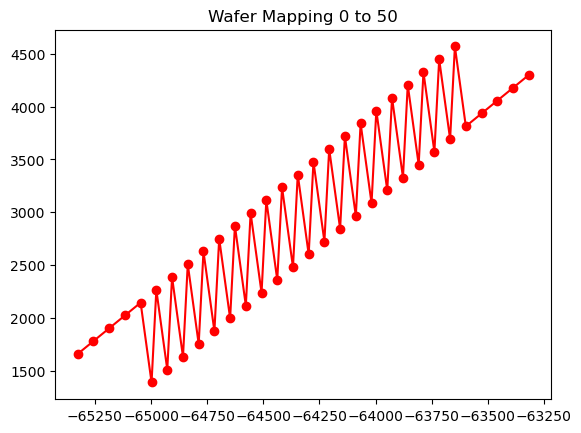

In [14]:
# goal 2 Ver2.01 update the data type we want to save

# it is vert important to keep index same 

# get_columns = ['Grouptype','GroupIndex','Group Section','Pad Label',
#                    'Pixel X center', 'Pixel Y center', 
#                    'Pad X center', 'Pad Y center']
data_goal2 = data[get_columns]

# GrouptypeIndex = 0
# GroupIndexIndex = 1
# GroupSectionIndex = 2
# PadLabelIndex = 3
# PixelXIndex = 4
# PixelYIndex = 5
# PadXIndex = 6
# PadYIndex = 7

data_goal2 = np.array(data_goal2).tolist()

# seperate the data by group section
group_A = []
group_B = []
group_C = []

for i in range(len(data_goal2)):
    if data_goal2[i][GroupSectionIndex] == 'A':
        group_A.append(data_goal2[i])

    elif data_goal2[i][GroupSectionIndex] == 'B':
        group_B.append(data_goal2[i])

    elif data_goal2[i][GroupSectionIndex] == 'C':
        group_C.append(data_goal2[i])

#reorder the group A B C use sorted function
# for group A, sort by pad x increasing
group_A = sorted(group_A, key = lambda x: np.float64(x[PadXIndex]))
# for group B, sort by pad y decreasing
group_B = sorted(group_B, key = lambda x: np.float64(x[PadYIndex]), reverse=True)
# for group A, sort by pad x decreasing
group_C = sorted(group_C, key = lambda x: np.float64(x[PadXIndex]), reverse=True)

reorder_data = group_A + group_B + group_C

# print(reorder_data)
# #save the reorder data to a file
# reorder_data = np.array(reorder_data)
# df4 = pd.DataFrame(reorder_data,columns = get_columns)
# df4.to_csv('.\\newdata\\goal1 Ver2 reorder data.csv', index=False)

                                         

#by for loop of 50 I find not all data is in a 50 group
for i in range(int(len(reorder_data)/50)+1):
    #i = 12 #show the case for 600 - 650
    j = i+1

    pad_x_re = [np.float64(row[PadXIndex]) for row in reorder_data][i*50:j*50]
    pad_y_re = [np.float64(row[PadYIndex]) for row in reorder_data][i*50:j*50]
    
    plt.plot(pad_x_re,pad_y_re, 'ro-')
    plt.title(f'Wafer Mapping {i*50} to {j*50}')
    plt.show()
    break # only show one figure for now


We have  3528  data 
 max is:  61122.58203949385 
 min is:  0.0


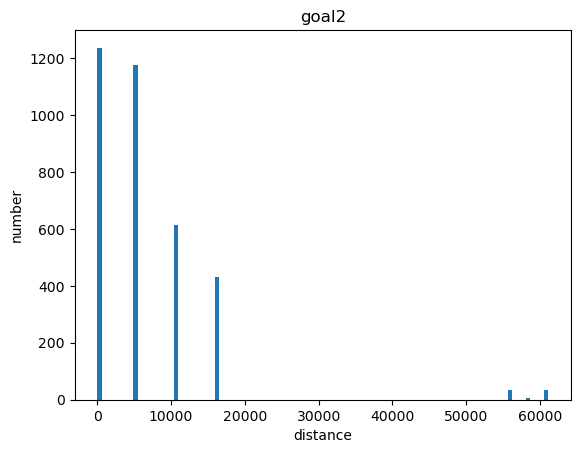

In [15]:
""" goal 2 Ver2.01
get distance between pixel by don't separate the pad up and down, only along x increasing
"""
goal2 = [],[],[]

def disOnlyX(reorder_data):
    # the function will return the distance between pixel from neighbor pad(only along x increasing)
    #print((reorder_data))
    for i in range(len(reorder_data)):
        if i+1 < len(reorder_data):
            pad_x_distance = reorder_data[i][PixelXIndex] - reorder_data[i+1][PixelXIndex]
            pad_y_distance = reorder_data[i][PixelYIndex] - reorder_data[i+1][PixelYIndex]
            distance = np.sqrt((pad_x_distance)**2 + (pad_y_distance)**2)

            goal2[0].append(distance)
            goal2[1].append(reorder_data[i])
            goal2[2].append(reorder_data[i+1])
            
            
        elif i+1 == len(reorder_data):
            pad_x_distance = reorder_data[i][PixelXIndex] - reorder_data[0][PixelXIndex]
            pad_y_distance = reorder_data[i][PixelYIndex] - reorder_data[0][PixelYIndex]
            distance = np.sqrt((pad_x_distance)**2 + (pad_y_distance)**2)

            goal2[0].append(distance)
            goal2[1].append(reorder_data[i])
            goal2[2].append(reorder_data[0])
            
        

    distance_goal2_Ver2 = goal2[0]
    print("We have ",len(distance_goal2_Ver2),
    " data \n max is: ",np.max(distance_goal2_Ver2),
    "\n min is: ",np.min(distance_goal2_Ver2))

    num, bins, patches = plt.hist(distance_goal2_Ver2, bins = 100)
    # bins = 60000 need 1m 16s to run

    path_filename = f'.\data\goal2 Ver2.1 {len(bins)-1}bins '


    #create an array stored the value number per bin
    number_per_bin = []
    for i in range(len(patches)):
        if num[i] != 0:
            number_per_bin.append([f"({bins[i]},{bins[i+1]})",num[i]])
                
    # Save data to CSV
    number_per_bin = np.array(number_per_bin)
    data_NpB = np.column_stack((number_per_bin[:,0],number_per_bin[:,1])) 
    # the data for number_per_bin
    df = pd.DataFrame(data_NpB,columns=['range of distance','number in the range'])
    df.to_csv(f'{path_filename}.csv', index=False)

    plt.title("goal2")
    plt.xlabel("distance")
    plt.ylabel("number")
    save2poster('goal2.svg')

    plt.savefig(f'{path_filename}.png')  
    #plt.xscale('log')   
    plt.show()

disOnlyX(reorder_data)


In [16]:
# goal 2 Ver2.1 pixel analysis

#save the goal info to a file
goal2_dis = np.array(goal2[0])
goal2_first_pad_info = np.array(goal2[1])
goal2_second_pad_info = np.array(goal2[2])

g2_dis_pad_info = np.column_stack((goal2_dis, goal2_first_pad_info, goal2_second_pad_info))

g2_1st_col = ['1st '+column for column in get_columns]
g2_2nd_col = ['2nd '+column for column in get_columns]
column_name = ['pixel distance']+g2_1st_col+g2_2nd_col  

g2_df1 = pd.DataFrame(g2_dis_pad_info,columns = column_name )
g2_df1.to_csv(f'.\data\goal2 Ver2.1 all pad pixel info.csv', index=False)



In [17]:
#pick up all pad info related to the label X which is x00+ or x00-
g2_xlabel_info_dis = []
g2_xlabel_info_1st_pad = []
g2_xlabel_info_2nd_pad = []

for i in range(len(goal2_first_pad_info)):
    
    if 'X' in goal2_first_pad_info[i][PadLabelIndex] \
        or 'X' in goal2_second_pad_info[i][PadLabelIndex]:

        g2_xlabel_info_dis.append(goal2_dis[i])
        g2_xlabel_info_1st_pad.append(goal2_first_pad_info[i])
        g2_xlabel_info_2nd_pad.append(goal2_second_pad_info[i])

g2_xlabel_info_dis = np.array(g2_xlabel_info_dis)
g2_xlabel_info_1st_pad = np.array(g2_xlabel_info_1st_pad)
g2_xlabel_info_2nd_pad = np.array(g2_xlabel_info_2nd_pad)
#print(xlabel_info_1st_pad)
g2_xlabel_info = np.column_stack((g2_xlabel_info_dis, 
                                  g2_xlabel_info_1st_pad, 
                                  g2_xlabel_info_2nd_pad))

g2_df2 = pd.DataFrame(g2_xlabel_info, columns=column_name)
g2_df2.to_csv('.\data\goal2 Ver2.1 X label pad info.csv', index=False)

# #scatter the pad info include x label

# plt.scatter(np.float64(g2_xlabel_info_1st_pad[:,PadXIndex]), 
#             np.float64(g2_xlabel_info_1st_pad[:,PadYIndex]), c='r', marker='o')
# plt.scatter(np.float64(g2_xlabel_info_2nd_pad[:,PadXIndex]), 
#             np.float64(g2_xlabel_info_2nd_pad[:,PadYIndex]), c='b', marker='o')
# plt.show()





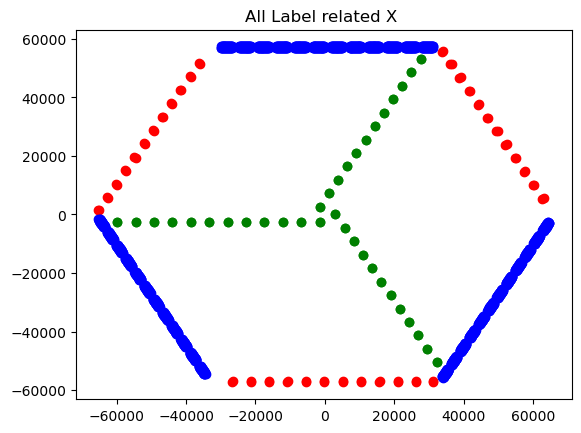

['RowPad'] 72
72 = 12 * 3 * 2


In [18]:
# scatter the pad info only with x label
g2_only_x_label = []
g2_only_ColPad_type = [] 

for i in range(len(goal2_first_pad_info)):
    
    if 'X' in goal2_first_pad_info[i][PadLabelIndex]:
        g2_only_x_label.append(goal2_first_pad_info[i])
    # if 'X' in goal2_second_pad_info[i][PadLabelIndex]:
    #     g2_only_x_label.append(goal2_second_pad_info[i])
    if 'ColumnPad' in goal2_first_pad_info[i][GrouptypeIndex]:
        g2_only_ColPad_type.append(goal2_first_pad_info[i])
    
g2_only_x_label = np.array(g2_only_x_label)
g2_only_x_label_pad_x = g2_only_x_label[:,PadXIndex]
g2_only_x_label_pad_y = g2_only_x_label[:,PadYIndex]

g2_only_x_label_pixel_x = g2_only_x_label[:,PixelXIndex]
g2_only_x_label_pixel_y = g2_only_x_label[:,PixelYIndex]

g2_only_ColPad_type = np.array(g2_only_ColPad_type)
g2_only_ColPad_type_pad_x = g2_only_ColPad_type[:,PadXIndex]
g2_only_ColPad_type_pad_y = g2_only_ColPad_type[:,PadYIndex]


plt.scatter(np.float64(g2_only_x_label_pad_x),
            np.float64(g2_only_x_label_pad_y), c='r', marker='o')
plt.scatter(np.float64(g2_only_ColPad_type_pad_x),
            np.float64(g2_only_ColPad_type_pad_y), c='b', marker='o')
plt.scatter(np.float64(g2_only_x_label_pixel_x),
            np.float64(g2_only_x_label_pixel_y), c='g', marker='o')
plt.title('All Label related X ')
save2poster('xlabel.svg')
plt.show()

g2_only_x_label_type = g2_only_x_label[:,GrouptypeIndex]
print(np.unique(g2_only_x_label_type),len(g2_only_x_label_type))
print("72 = 12 * 3 * 2")

In [19]:
#pick up all pad info related to the label X which is x00+ and x00-
g2_xx_info_dis = []
g2_xx_info_1st_pad = []
g2_xx_info_2nd_pad = []

for i in range(len(goal2_first_pad_info)):
    
    if 'X' in goal2_first_pad_info[i][PadLabelIndex] \
        and 'X' in goal2_second_pad_info[i][PadLabelIndex]:

        g2_xx_info_dis.append(goal2_dis[i])
        g2_xx_info_1st_pad.append(goal2_first_pad_info[i])
        g2_xx_info_2nd_pad.append(goal2_second_pad_info[i])

g2_xx_info_dis = np.array(g2_xx_info_dis)
g2_xx_info_1st_pad = np.array(g2_xx_info_1st_pad)
g2_xx_info_2nd_pad = np.array(g2_xx_info_2nd_pad)

g2_xx_info = np.column_stack((g2_xx_info_dis, 
                                  g2_xx_info_1st_pad, 
                                  g2_xx_info_2nd_pad))

g2_df2 = pd.DataFrame(g2_xx_info, columns=column_name)
g2_df2.to_csv('.\data\goal2 Ver2.1 X00+- pad info.csv', index=False)



<class 'numpy.ndarray'>


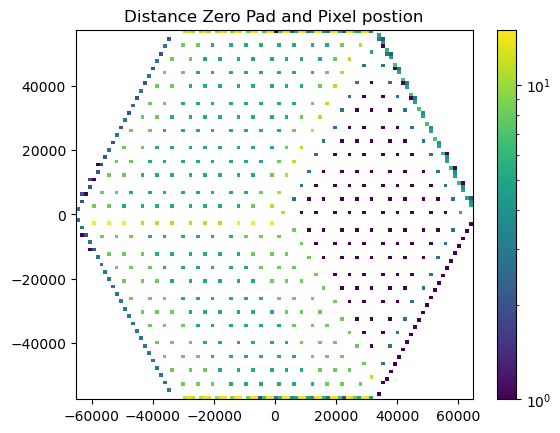

In [20]:
#show all dis is zero
g2_0dis_1st = []
g2_0dis_2nd = []
for i in range(len(goal2_first_pad_info)):
    if goal2_dis[i] == 0:
        g2_0dis_1st.append(goal2_first_pad_info[i])
        g2_0dis_2nd.append(goal2_second_pad_info[i])

g2_0dis_1st = np.array(g2_0dis_1st)
g2_0dis_2nd = np.array(g2_0dis_2nd)

g2_0dis_info = np.column_stack((g2_0dis_1st, g2_0dis_2nd))
g2_df3 = pd.DataFrame(g2_0dis_info, columns = g2_1st_col+g2_2nd_col )
g2_df3.to_csv('.\data\goal2 Ver2.1 same pixel pad info.csv', index=False)
print(type(g2_0dis_1st[:,PixelXIndex]))
plt.hist2d(np.float64(g2_0dis_1st[:,PixelXIndex]), np.float64(g2_0dis_1st[:,PixelYIndex]),
            bins = (100,100), norm=colors.LogNorm()) 
plt.hist2d(np.float64(g2_0dis_1st[:,PadXIndex]), np.float64(g2_0dis_1st[:,PadYIndex]),
            bins = (100,100), norm=colors.LogNorm())
# plt.hist2d(np.float64(g2_0dis_2nd[:,PadXIndex]), np.float64(g2_0dis_2nd[:,PadYIndex]),
#             bins = (100,100), norm=colors.LogNorm())
plt.title("Distance Zero Pad and Pixel postion")
plt.colorbar()
save2poster('zero ppp.svg')
plt.show()

#end of pixel analysis

In [21]:
"""# try to seperate the data to see plot more clearly
# 15901 is decide by the histogram data above
dis_g2V2_less15901 = []
dis_g2V2_other = []
for i in range(len(distance_goal2_Ver2)):
    if distance_goal2_Ver2[i] < 15901:
        dis_g2V2_less15901.append(distance_goal2_Ver2[i])
    else:
        dis_g2V2_other.append(distance_goal2_Ver2[i])

fig, axs = plt.subplots(2,1)

axs[0].hist(dis_g2V2_less15901, bins=10)
axs[1].hist(dis_g2V2_other, bins=10)
plt.xscale('log')
plt.show()

"""
print("no need for now")

no need for now


In [22]:
"""way 2 is error based on new info
get distance between pixel by separate the pad up and down


# goal 2 way2

data_goal2_way2 = data[['Grouptype','GroupIndex','Group Section',
                        'Pad X center', 'Pad Y center','Pixel X center', 'Pixel Y center']]
data_g2w2 = np.array(data_goal2_way2).tolist()

# seperate the data by group section
group_A = []
group_B = []
group_C = []



for i in range(len(data_g2w2)):
    #Group_Type = data_g2w2[i][0]
    #Group_Index = data_g2w2[i][1]
    Group_Section = data_g2w2[i][2]

    if Group_Section == 'A':
        group_A.append(data_g2w2[i])
    elif Group_Section == 'B':
        group_B.append(data_g2w2[i])
    elif Group_Section == 'C':
        group_C.append(data_g2w2[i])

#reorder the group A B C use sorted function
# for group A, sort by pad x increasing
group_A = sorted(group_A, key = lambda x: x[3])
# for group B, sort by pad y decreasing
group_B = sorted(group_B, key = lambda x: x[4], reverse=True)
# for group A, sort by pad x decreasing
group_C = sorted(group_C, key = lambda x: x[3], reverse=True)
 
reorder_data_w2 = group_A + group_B + group_C
reorder_data = 0 # free the memory
reorder_data = reorder_data_w2

#Index help: 
# Grouptype is 0; GroupIndex is 1; Group Section is 2; 
# Pad X center is 3; Pad Y center is 4; 
# Pixel X center is 5; Pixel Y center is 6

pad_distance = []
for i in range(len(reorder_data)):

    previous_Type = reorder_data[i][0]
    previous_Index = reorder_data[i][1]
    previous_group = reorder_data[i][2]

    if i+1 == len(reorder_data):
        # no need for the last data to first data
        #  because the distance is very large which is 111489.54008985765
        break    

    if reorder_data[i+1][0] != previous_Type:
        continue
    # if the group type change use continue to skip the distance calculation between diff group type

    if reorder_data[i+1][1] != previous_Index:
        continue
    # if the group index change ... skip ... diff group index
    
    if reorder_data[i+1][2] != previous_group:
        continue
    # if the group change ... skip ... diff group 

    # check the distance of pad(by x,y) for all value in group A
    if i+1 < len(reorder_data):
        dis = np.sqrt((reorder_data[i][3] - reorder_data[i+1][3])**2 + \
                      (reorder_data[i][4] - reorder_data[i+1][4])**2)
        
        pad_distance.append(dis)

#print(pad_distance)
#print(np.average(pad_distance))

num, bins, patches = plt.hist(pad_distance, bins=10)
plt.clf() # clear the plot no need show the plot

#create an array stored the value number per bin
number_per_bin = []
bin_value = [] #create a variable store the bins value

for i in range(len(patches)):
    if num[i] != 0:
        number_per_bin.append([f"({bins[i]},{bins[i+1]})",num[i]])    
        bin_value.append(bins[i])
        bin_value.append(bins[i+1])


#number_per_bin = np.array(number_per_bin)

#print(sum(num))# number of distance is 3456 which is correct (3456 + 6*12 = 3528)

#the next step is assume the histogram is known
# so second bin show that distance of neighbor pad is far away from each other
bin_value = np.unique(bin_value)
critical_pad_dis = int(bin_value[2]) 
print("critical value is ",critical_pad_dis) #critical value is 361

# # for all reorder_data which distance is larger than critical_distance need look for a closer pad

# # !!!copy from above code need function later!!!

# #pad_distance = []
# distance_goal2_way2 = []

# for i in range(len(reorder_data)):

#     previous_Type = reorder_data[i][0]
#     previous_Index = reorder_data[i][1]
#     previous_group = reorder_data[i][2]

#     if i+1 == len(reorder_data):
#         # no need for the last data to first data
#         #  because the distance is very large which is 111489.54008985765
#         break    

#     if reorder_data[i+1][0] != previous_Type:
#         continue
#     # if the group type change use continue to skip the distance calculation between diff group type

#     if reorder_data[i+1][1] != previous_Index:
#         continue
#     # if the group index change ... skip ... diff group index
    
#     if reorder_data[i+1][2] != previous_group:
#         continue
#     # if the group change ... skip ... diff group 

#     # check the distance of pad(by x,y) for all value in group A
#     if i+1 < len(reorder_data):
#         dis_pad = np.sqrt((reorder_data[i][3] - reorder_data[i+1][3])**2 + \
#                       (reorder_data[i][4] - reorder_data[i+1][4])**2)
        
#         dis_pixel = np.sqrt((reorder_data[i][5] - reorder_data[i+1][5])**2 + \
#                         (reorder_data[i][6] - reorder_data[i+1][6])**2)
        
#         if dis_pad > critical_pad_dis:

#             if i+2 < len(reorder_data)                \
#             and reorder_data[i+2][2] == previous_group\
#             and reorder_data[i+2][1] == previous_Index\
#             and reorder_data[i+2][0] == previous_Type: 
                
#         # assume the one after the next is more close
#                 dis_pad_after_next = np.sqrt((reorder_data[i][3] - reorder_data[i+2][3])**2 + \
#                             (reorder_data[i][4] - reorder_data[i+2][4])**2)
                
#                 if dis_pad_after_next > critical_pad_dis:
#                     # is the case that the next pad is also far away
#                     # which means the one after the next is set on different (up or donw) side
#                     continue #skip this case

#                 else:
#                     dis_pixel = np.sqrt((reorder_data[i][5] - reorder_data[i+2][5])**2 + \
#                         (reorder_data[i][6] - reorder_data[i+2][6])**2)
                
#             #else: #it more seems like no more else case?
#             # #no more pad is closer
#             #    frist try not do else to skip
                

#                 #pad_distance.append(dis_after_next)
#     distance_goal2_way2.append(dis_pixel)

# >>> check: the distance is all small then the critical_distance is correct
# histogram of the the pad distance
# num, bins, patches = plt.hist(pad_distance, bins=10)
# plt.xscale("linear")
# plt.show()

# #create an array stored the value number per bin
# number_per_bin = []

# for i in range(len(patches)):
#     if num[i] != 0:
#         number_per_bin.append([f"({bins[i]},{bins[i+1]})",num[i]])    



# number_per_bin = np.array(number_per_bin)
# print(number_per_bin)
# <<< Done for the check

# #print(np.unique(distance_goal2_way2))

# #goal2 way2 result output:
# num, bins, patches = plt.hist(distance_goal2_way2, bins=3)
# plt.xscale("linear")


# #create an array stored the value number per bin
# number_per_bin = []

# for i in range(len(patches)):
#     if num[i] != 0:
#         number_per_bin.append([f"({bins[i]},{bins[i+1]})",num[i]])    
# # end of for loop

# path_filename = f'.\data\goal2 way2 {len(bins)-1}bins '
# # Save data to CSV
# number_per_bin = np.array(number_per_bin)
# data_NpB = np.column_stack((number_per_bin[:,0],number_per_bin[:,1])) 
# # the data for number_per_bin
# df = pd.DataFrame(data_NpB,columns=['range of distance','number in the range'])
# df.to_csv(f'{path_filename}.csv', index=False)


# plt.savefig(f'{path_filename}.png')  
# #plt.xscale('log')   
# plt.show()  

#"""
print("way2 error based on new info")

way2 error based on new info


In [23]:
""" this part of code is calculate the distance between pixel and pad
"""

#use the for loop for all pixel position to calculate the distance to the pad
# this wouldn't grouping the pixel at same positon 

# distance = []

# #distance = sqrt((x1-x2)^2 + (y1-y2)^2)
# for i in range(len(data)):
#     x_distance = pixel_x_center[i]-pad_x_center[i]
#     y_distance = pixel_y_center[i]-pad_y_center[i]
#     distance.append(np.sqrt(x_distance**2 + y_distance**2))


# #show how many pixel we calculted the distance
# print("We have ",len(distance),
#       " data \n max is: ",np.max(distance),
#       "\n min is: ",np.min(distance)) 

# num, bins, patches = plt.hist(distance, bins=10)
# plt.savefig(f'.\data\pixel to pad {len(bins)-1}bins data.png') 
# #   bins =60000 need run 1min22sec

# #create an array stored the value number per bin
# number_per_bin = []
# for i in range(len(patches)):
#     if num[i] != 0:
#         number_per_bin.append([f"({bins[i]},{bins[i+1]})",num[i]])
        
    
    
# # Save data to CSV
# number_per_bin = np.array(number_per_bin)
# data_NpB = np.column_stack((number_per_bin[:,0],number_per_bin[:,1])) 
# # the data for number_per_bin
# df = pd.DataFrame(data_NpB,columns=['range of distance','number in the range'])
# df.to_csv(f'.\data\pixel to pad {len(bins)-1}bins data.csv', index=False)


# plt.show()

' this part of code is calculate the distance between pixel and pad\n'

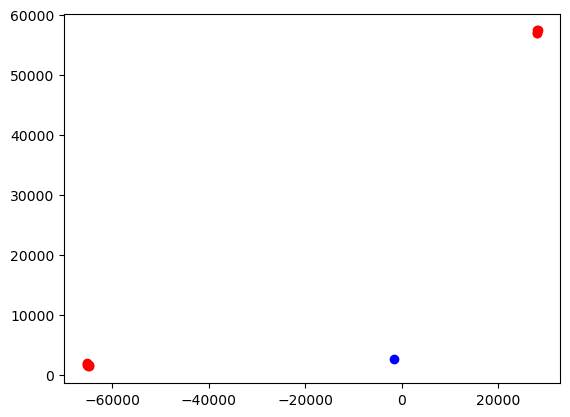

In [24]:
"""test the goal1 by using the Pixel X center,Pixel Y center = (-1529.978,2650.000) point
    one point show x,y position of the wafer
    plot four wires(?) show the wafer to pad edge
    
May need use animation to show each wafer to pad edge
problem is the plot about pad position is not clear
"""
#pick out the test point (-1529.978,2650.000)
testPoint = [[],[]]



for i in range(len(data)):
    # sorry for the confusion when index is 0 is point (-1529.978,2650.000)
    if (data['Pixel X center'][i] == pixel_x_center[0]) and (data['Pixel Y center'][i] == pixel_y_center[0]):
        testPoint[0].append([data['Pad X center'][i]])
        testPoint[1].append([data['Pad Y center'][i]])
        

#print(testPoint)
plt.scatter(pixel_x_center[0],pixel_y_center[0], c='b',marker='o')
plt.scatter(testPoint[0],testPoint[1], c='r',marker='o')
#plt.xscale('log') #???
plt.show()
